# Plotly Trial

- use_plotly: true

In [39]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns
from sklearn.metrics import mean_squared_error # Scoring metric
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import psutil
import GPUtil
from tqdm import tqdm
from bayes_opt import BayesianOptimization


from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb

from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings("ignore")

# get file path
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
df = pd.read_parquet("nyc_sample_train.parquet")

mapp = df[['dropoff_longitude', 'dropoff_latitude', 'fare_amount']]
mapp = mapp.loc[(df["dropoff_longitude"] >= -74.25) &
           (df["dropoff_longitude"] <= -73.5) &
               df['fare_amount'] <= 200]

In [ ]:
# import datashader as ds, colorcet as cc
# import holoviews as hv
# from holoviews.element.tiles import EsriImagery
# from holoviews.operation.datashader import datashade
# hv.extension('bokeh')

# map_tiles  = EsriImagery().opts(alpha = 0.5, width=900, height=480, active_tools=['pan', 'wheel_zoom'], bgcolor = "black")
# points     = hv.Points(ds.utils.lnglat_to_meters(mapp['dropoff_longitude'], mapp['dropoff_latitude']))
# taxi_trips = datashade(points, x_sampling=0.00001, y_sampling=0.00001, cmap=cc.fire, width=900, height=480)

# map_tiles * taxi_trips

In [ ]:
# import plotly.express as px

# m = mapp.sample(frac = 0.001)

In [ ]:
# px.scatter(m, x = 'dropoff_longitude', y = 'dropoff_latitude', color = 'fare_amount')

In [ ]:
# import pandas as pd
# df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/uber-rides-data1.csv')
# dff = df.query('Lat < 40.82').query('Lat > 40.70').query('Lon > -74.02').query('Lon < -73.91')

# import datashader as ds
# cvs = ds.Canvas(plot_width=1000, plot_height=1000)
# agg = cvs.points(dff, x='Lon', y='Lat')
# # agg is an xarray object, see http://xarray.pydata.org/en/stable/ for more details
# coords_lat, coords_lon = agg.coords['Lat'].values, agg.coords['Lon'].values
# # Corners of the image, which need to be passed to mapbox
# coordinates = [[coords_lon[0], coords_lat[0]],
#                [coords_lon[-1], coords_lat[0]],
#                [coords_lon[-1], coords_lat[-1]],
#                [coords_lon[0], coords_lat[-1]]]

# from colorcet import fire
# import datashader.transfer_functions as tf
# img = tf.shade(agg, cmap=fire)[::-1].to_pil()

# import plotly.express as px
# # Trick to create rapidly a figure with mapbox axes
# fig = px.scatter_mapbox(dff[:1], lat='Lat', lon='Lon', zoom=12)
# # Add the datashader image as a mapbox layer image
# fig.update_layout(mapbox_style="carto-darkmatter",
#                  mapbox_layers = [
#                 {
#                     "sourcetype": "image",
#                     "source": img,
#                     "coordinates": coordinates
#                 }]
# )
# fig.show()

In [26]:
mapp

,dropoff_longitude,dropoff_latitude,fare_amount
0,-73.841614,40.712276,4.500000
1,-73.979271,40.782005,16.900000
2,-73.991241,40.750561,5.700000
3,-73.991570,40.758091,7.700000
4,-73.956657,40.783764,5.300000
...,...,...,...
549995,-73.972481,40.787483,20.500000
549996,-73.983116,40.735619,25.870001
549997,-73.959274,40.763645,8.500000
549998,-73.984337,40.748650,14.100000


In [35]:
import datashader as ds, colorcet as cc

cvs = ds.Canvas(plot_width=850, plot_height=500, x_range = (-74.15, -73.7), y_range = (40.5, 41))
agg = cvs.points(mapp, 'dropoff_longitude', 'dropoff_latitude')
img = ds.tf.shade(agg, cmap=cc.fire, how='log')

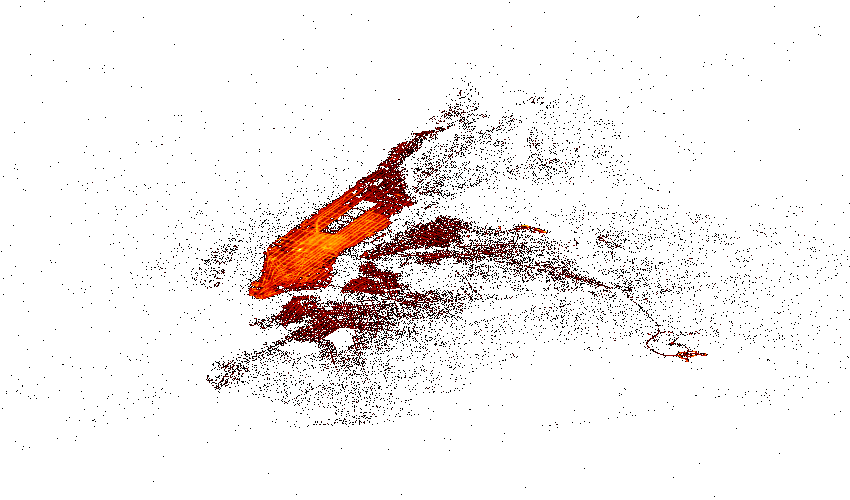

In [36]:
img

In [41]:
pickup = df[['pickup_longitude', 'pickup_latitude', 'fare_amount']]
pickup = pickup.loc[(pickup['pickup_latitude'] >= 40.5) &
                    (pickup['pickup_latitude'] <= 41) &
                    (pickup['pickup_longitude'] >= -74.1) &
                    (pickup['pickup_longitude'] <= -73.7) &
                    (pickup['fare_amount'] > 0) &
                    (pickup['fare_amount'] <= 200)]

Q1, Q3 = pickup['fare_amount'].quantile(q = [0.25, 0.75]).values
IQR = Q3 - Q1
fare_min, fare_max = Q1 - (1.5 * IQR), Q3 + (1.5 * IQR)

fare_min, fare_max

(-3.75, 22.25)

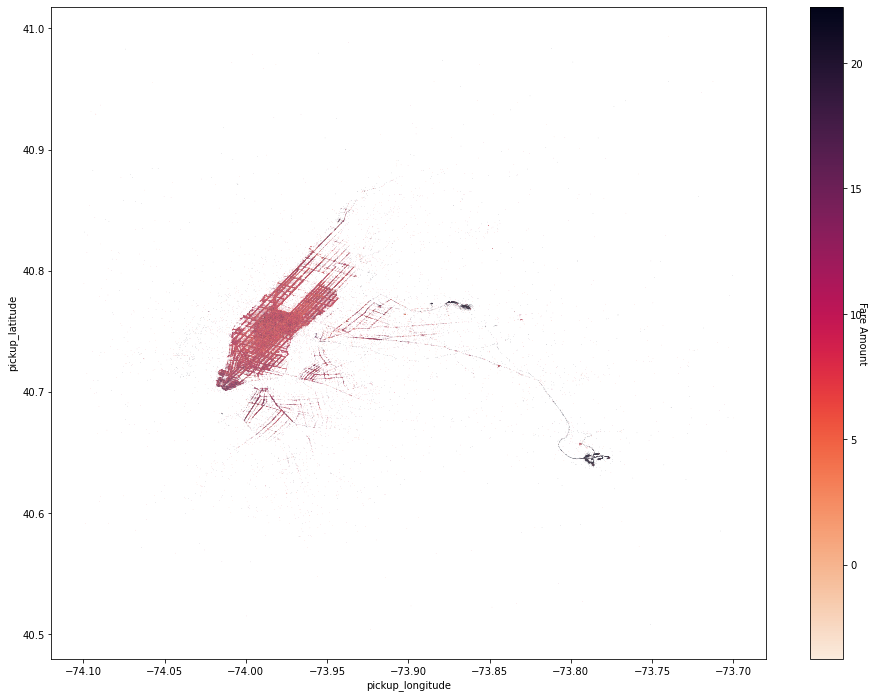

In [42]:
plt.figure(figsize = (16, 12))

ax = sns.scatterplot(data = pickup, x='pickup_longitude', y='pickup_latitude', hue = pickup['fare_amount'], palette = 'rocket_r', hue_norm = (fare_min, fare_max), s = 0.1)
norm = plt.Normalize(fare_min, fare_max)
sm = plt.cm.ScalarMappable(cmap="rocket_r", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
ax.get_legend().remove()
cbar = ax.figure.colorbar(sm)
cbar.set_label('Fare Amount', rotation=270)

plt.show()